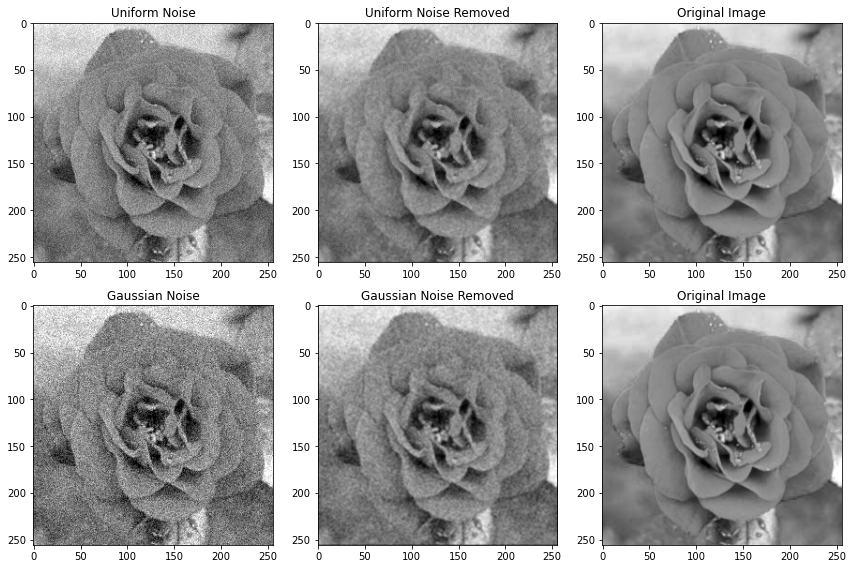

In [1]:
#Problem 3: Noise removal - (1) Gray-level image

import numpy as np
import matplotlib.pyplot as plt

def read_raw_image(file_path, shape):
    with open(file_path, 'rb') as file:
        img = np.fromfile(file, dtype=np.uint8)
    return img.reshape(shape)

def median_filter(img, kernel_size=3):
    padded_img = np.pad(img, kernel_size//2, mode='constant')
    output_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output_img[i, j] = np.median(padded_img[i:i+kernel_size, j:j+kernel_size])
    return output_img

def gaussian_filter(img, kernel_size=3, sigma=1):
    kernel = np.fromfunction(lambda x, y: (1/ (2 * np.pi * sigma**2)) * 
                             np.exp(- ((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2) / (2 * sigma**2)), 
                             (kernel_size, kernel_size))
    kernel /= np.sum(kernel)
    padded_img = np.pad(img, kernel_size//2, mode='constant')
    output_img = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output_img[i, j] = np.sum(padded_img[i:i+kernel_size, j:j+kernel_size] * kernel)
    return output_img

# Load the raw images
rose_uni = read_raw_image('./Project1_Files/Images/rose_uni.raw', (256, 256))
rose_gau = read_raw_image('./Project1_Files/Images/rose_gau.raw', (256, 256))
rose_original = read_raw_image('./Project1_Files/Images/rose.raw', (256, 256))

# Apply median filter for uniform noise
rose_uni_filtered = median_filter(rose_uni)

# Apply gaussian filter for gaussian noise
rose_gau_filtered = gaussian_filter(rose_gau)

# Display the images
plt.figure(figsize=(12, 8))
plt.subplot(231), plt.imshow(rose_uni, cmap='gray'), plt.title('Uniform Noise')
plt.subplot(232), plt.imshow(rose_uni_filtered, cmap='gray'), plt.title('Uniform Noise Removed')
plt.subplot(233), plt.imshow(rose_original, cmap='gray'), plt.title('Original Image')
plt.subplot(234), plt.imshow(rose_gau, cmap='gray'), plt.title('Gaussian Noise')
plt.subplot(235), plt.imshow(rose_gau_filtered, cmap='gray'), plt.title('Gaussian Noise Removed')
plt.subplot(236), plt.imshow(rose_original, cmap='gray'), plt.title('Original Image')
plt.tight_layout()
plt.show()


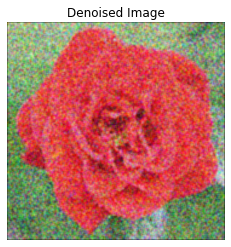

In [2]:
#Problem 3: Noise removal - (2) Color image
import numpy as np
import matplotlib.pyplot as plt

def read_raw_image(file_path, shape):
    # Reading the raw image file
    with open(file_path, 'rb') as file:
        img = np.fromfile(file, dtype=np.uint8)
    return img.reshape(shape)

def write_raw_image(img, file_path):
    # Writing the image to a raw file
    with open(file_path, 'wb') as file:
        img.tofile(file)

def convolve(image, kernel):
    # Getting the dimensions
    img_height, img_width, _ = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Padding the image
    pad_height, pad_width = kernel_height // 2, kernel_width // 2
    padded_img = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), 'constant')
    
    # Convolution
    output_img = np.zeros((img_height, img_width, 3), dtype=np.uint8)
    for i in range(img_height):
        for j in range(img_width):
            for k in range(3):  # For each color channel
                region = padded_img[i:i+kernel_height, j:j+kernel_width, k]
                output_img[i, j, k] = np.sum(region * kernel)
    return output_img

# Define the average kernel for blurring
average_kernel = np.ones((3, 3)) / 9

# Reading the noisy image
noisy_image_path = './Project1_Files/Images/rose_color_noise.raw'
noisy_image_shape = (256, 256, 3)  # Assuming the image is a 256x256 RGB image
noisy_image = read_raw_image(noisy_image_path, noisy_image_shape)

# Applying the convolution with the average kernel
denoised_image = convolve(noisy_image, average_kernel)

def plot_image(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Plotting the denoised image
plot_image(denoised_image, 'Denoised Image')
